In [1]:
import numpy as np
import time
from scipy.sparse import load_npz
DPATH = 'data/'

# Loading and displaying datasets

In [2]:
# Loading two (big) datasets

X_10x = load_npz(DPATH + "mousebrain_10x_tointegrate.npz").toarray()
X_10x = np.log(X_10x / X_10x.sum(axis=1)[:,None] + 1)
classes_10x = np.loadtxt(DPATH + "mousebrain_10x_classes.csv", dtype=str)

X_splitseq = load_npz(DPATH + "mousebrain_splitseq_tointegrate.npz").toarray()
X_splitseq = np.log(X_splitseq / X_splitseq.sum(axis=1)[:,None] + 1)
classes_splitseq = np.loadtxt(DPATH + "mousebrain_splitseq_classes.csv", dtype=str)

In [3]:
# plotting function

import umap
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

n_components = 10
metric = "euclidean"
figwidth = 12
dotsize = .1
titlesize = 20
labelsize = 15
legendsize = 12
markersize = 2

def plot_datasets(
    X,
    mode_ys,
    mode_names
):
    
    print("Computing PCA...")
    X_fused_before_red = PCA(n_components=n_components).fit_transform(X)
    
    print("Computing UMAP...")
    X_umap = umap.UMAP().fit_transform(X_fused_before_red)

    print("Plotting...")

    nmodes = len(mode_ys)
    plt.figure(figsize=(nmodes*figwidth,figwidth))
    for i, (name, y) in enumerate(zip(mode_names, mode_ys)):
        print(name, ":", list(set(y)))
        
        plt.subplot(1,nmodes,i+1)
        for i, modename in enumerate(set(y)):
            plt.scatter(*X_umap[y == modename].T, s=dotsize, label=modename)
        plt.xticks([])
        plt.yticks([])
        plt.xlabel("UMAP1", fontsize=labelsize)
        plt.ylabel("UMAP2", fontsize=labelsize)
        plt.title("Colored by %s" % name, fontsize=titlesize)
        if name != "donor ID":
            plt.legend(markerscale=markersize/dotsize, fontsize=legendsize)

Computing PCA...
Computing UMAP...
Plotting...
Cell type : ['Oligos', 'Neurons', 'Vascular', 'Ependymal', 'Immune', 'Astrocytes', 'PeripheralGlia']


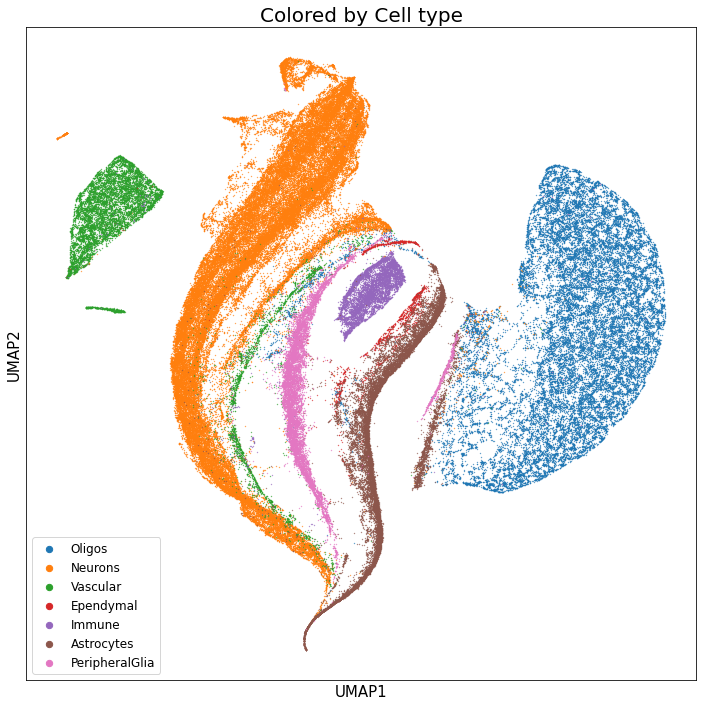

In [4]:
# 10x dataset

plot_datasets(X_10x, [classes_10x], ["Cell type"])

Computing PCA...
Computing UMAP...
Plotting...
Cell type : ['Oligos', 'Astrocyte', 'Vascular', 'Neurons', 'Immune', 'Ependymal', 'PeripheralGlia']


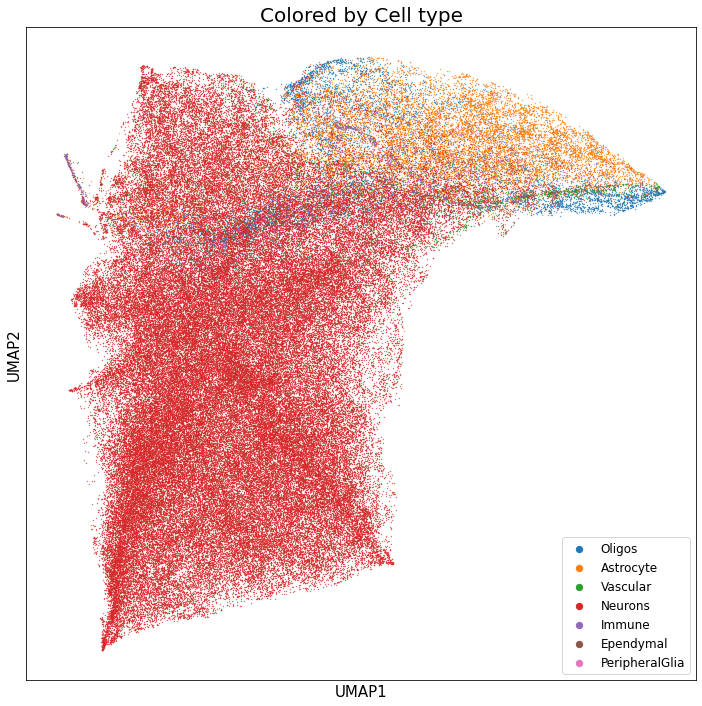

In [4]:
# splitseq dataset

plot_datasets(X_splitseq, [classes_splitseq], ["Cell type"])

Computing PCA...
Computing UMAP...
Plotting...
Dataset : ['SplitSeq', '10x']
Cell type : ['Oligos', 'Neurons', 'Vascular', 'Ependymal', 'Immune', 'Astrocytes', 'Astrocyte', 'PeripheralGlia']


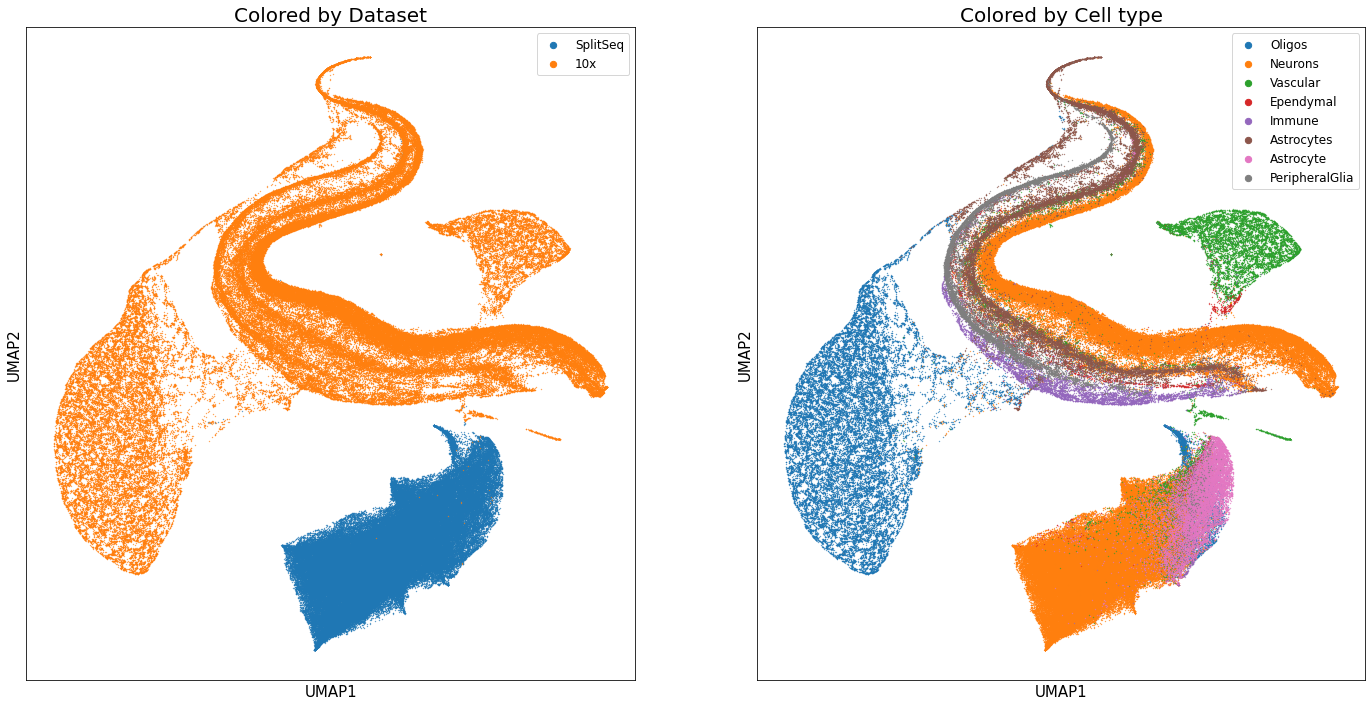

In [6]:
# both in same gene space

all_X = np.concatenate( (X_10x, X_splitseq), axis=0 )
all_ydataset = np.array(['10x']*len(X_10x) + ['SplitSeq']*len(X_splitseq))
all_ycelltype = np.concatenate( (classes_10x, classes_splitseq) )
plot_datasets(all_X, [all_ydataset, all_ycelltype], ["Dataset", "Cell type"])